In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [27]:
df=pd.read_csv("IMDB Dataset.csv")

In [28]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
495,"""American Nightmare"" is officially tied, in my...",negative
496,"First off, I have to say that I loved the book...",negative
497,This movie was extremely boring. I only laughe...,negative
498,I was disgusted by this movie. No it wasn't be...,negative


In [29]:
df.shape

(500, 2)

In [30]:
df.describe(include="all")

,review,sentiment
count,500,500
unique,500,2
top,One of the other reviewers has mentioned that ...,negative
freq,1,263


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     500 non-null    object
 1   sentiment  500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


In [32]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [33]:
df["sentiment"].value_counts()

sentiment
negative    263
positive    237
Name: count, dtype: int64

In [40]:
def clean_review (review):
    str =" ".join(word for word in review.split() if word.lower() not in stopwords.words("english"))
    return str

In [41]:
df["review"] = df["review"].apply(clean_review)

In [53]:
from wordcloud import WordCloud

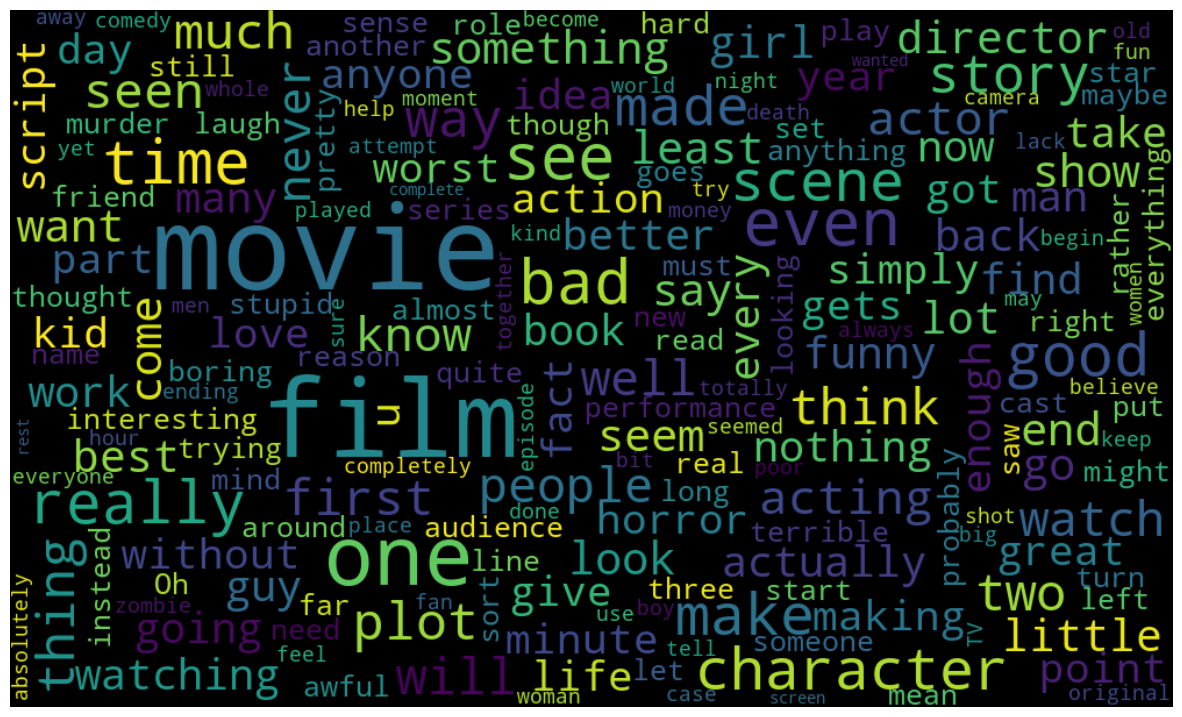

In [63]:
reviews = " ".join(word for word in data["review"][df["sentiment"] == "negative"].astype(str))
wordcloud = WordCloud(height = 600,width = 1000, max_font_size = 100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation="bilinear")
plt.axis("off")
plt.show()

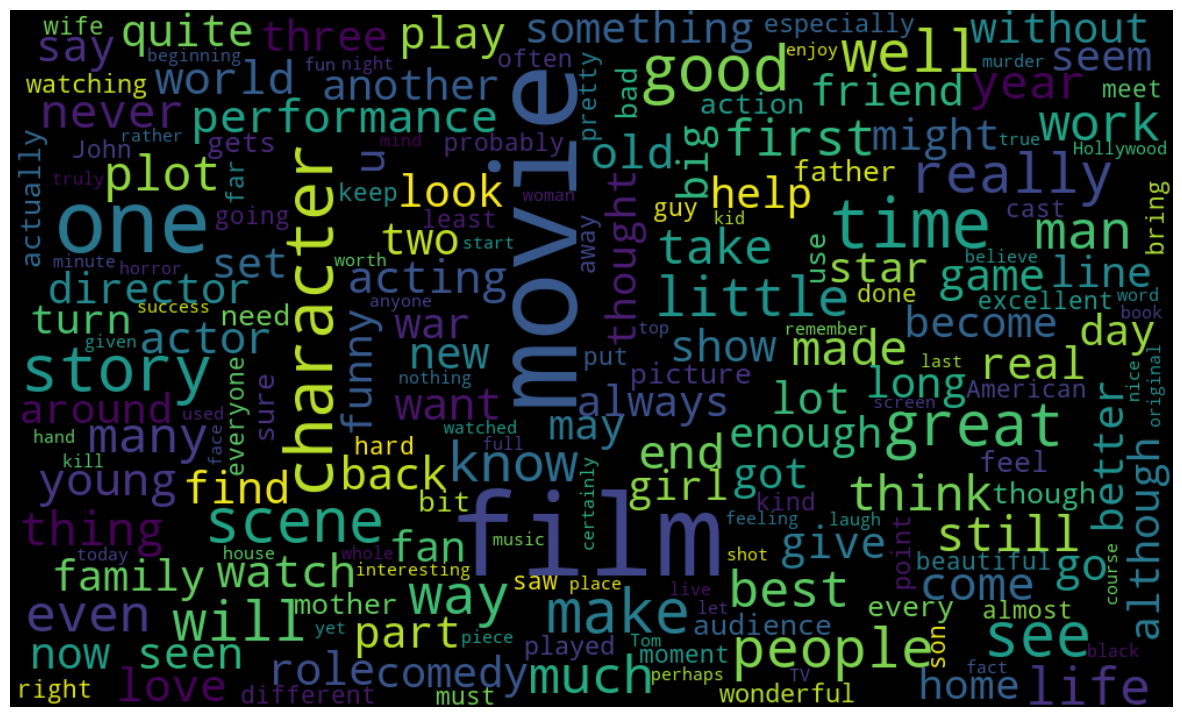

In [64]:
reviews = " ".join(word for word in data["review"][df["sentiment"] == "positive"].astype(str))
wordcloud = WordCloud(height = 600,width = 1000, max_font_size = 100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation="bilinear")
plt.axis("off")
plt.show()

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)

In [66]:
reviews = cv.fit_transform(df["review"]).toarray()

In [67]:
df["sentiment"] = df["sentiment"].replace(["positive","negative"],[1,0])

In [68]:
df["sentiment"].value_counts()

sentiment
0    263
1    237
Name: count, dtype: int64

In [69]:
from sklearn.linear_model import LogisticRegression

In [71]:
model = LogisticRegression()

In [74]:
from sklearn.model_selection import train_test_split

In [76]:
reviews_train,reviews_test,sent_train,sent_test = train_test_split(reviews,df["sentiment"],test_size=0.2)

In [77]:
model.fit(reviews_train,sent_train)

LogisticRegression()

In [81]:
predict=model.predict(reviews_test)

In [82]:
predict

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

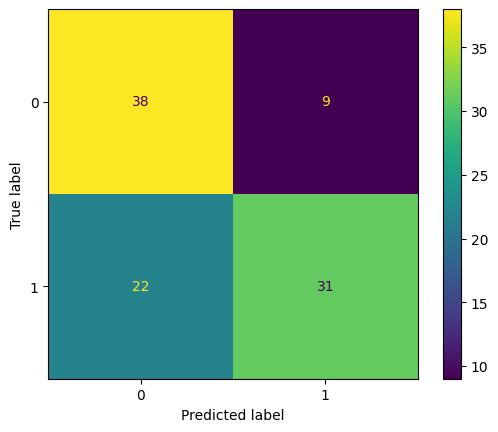

In [84]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(sent_test,predict,labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
display.plot()
plt.show()

In [87]:
pk.dump(model,open("model.pkl","wb"))